# Random Forest


### 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

In [2]:
import pandas as pd
df=pd.read_csv("glass.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [7]:
# Fill missing values in numerical columns with median
for col in df:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\vanam\AppData\Local\Temp\ipykernel_2192\2211092769.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

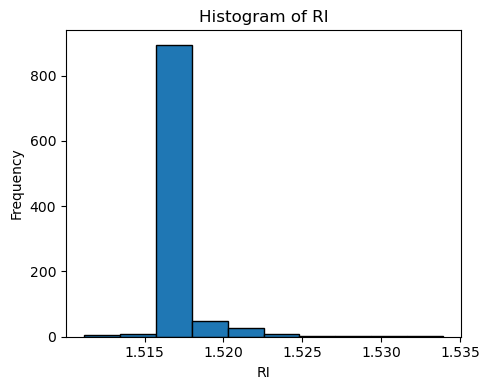

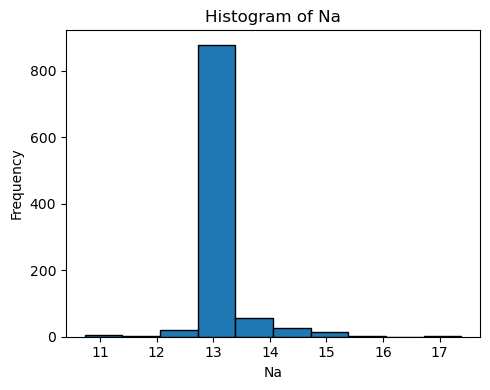

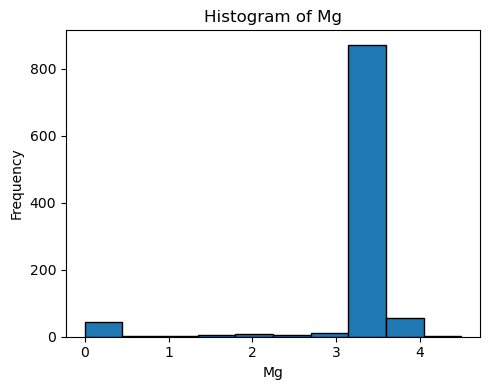

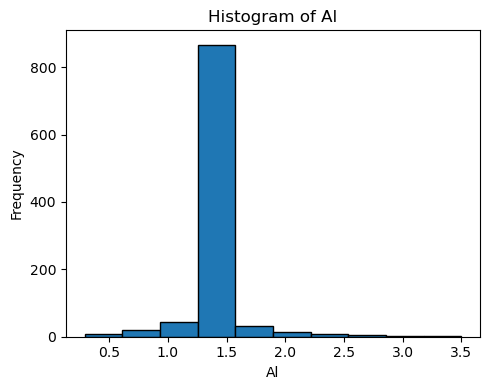

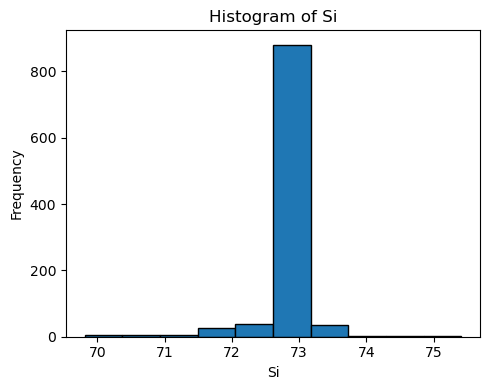

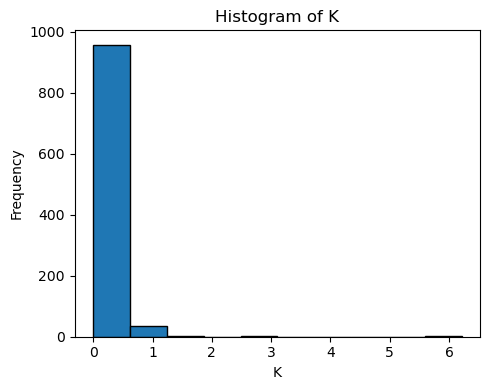

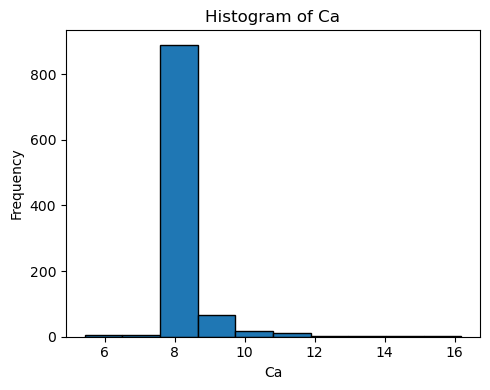

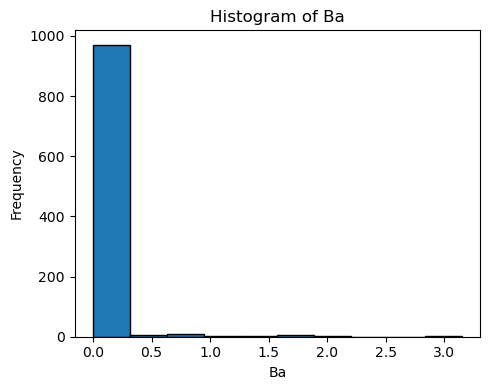

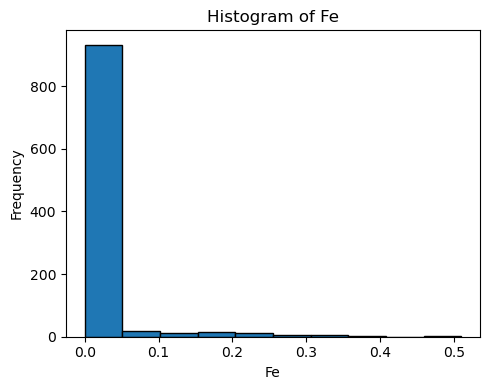

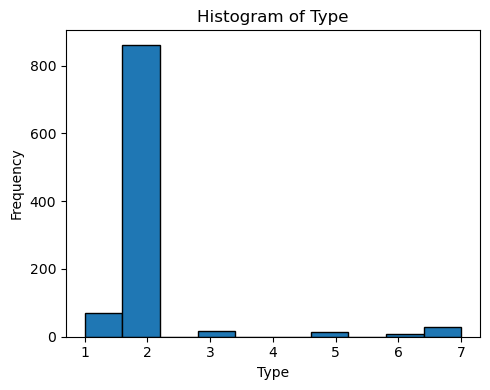

In [9]:
# ---------------------------------------------------
#  HISTOGRAMS 
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in df.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.hist(df[col], edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

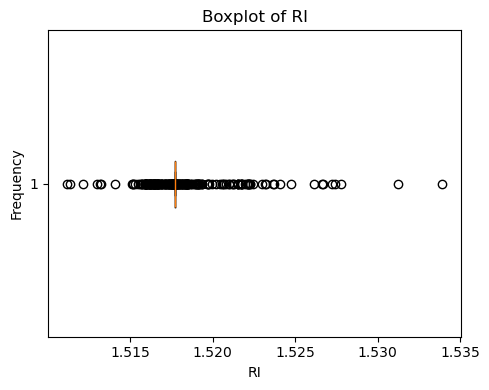

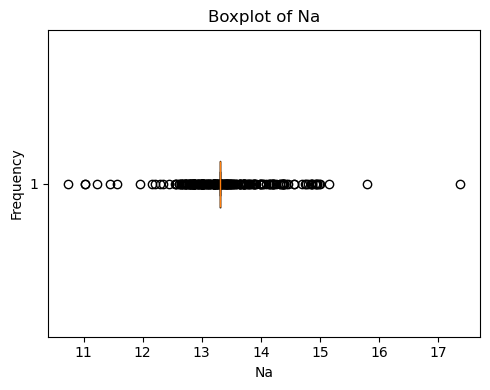

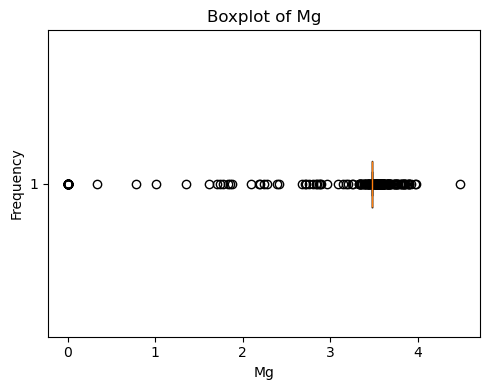

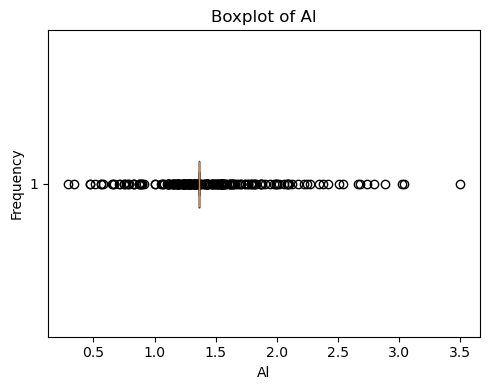

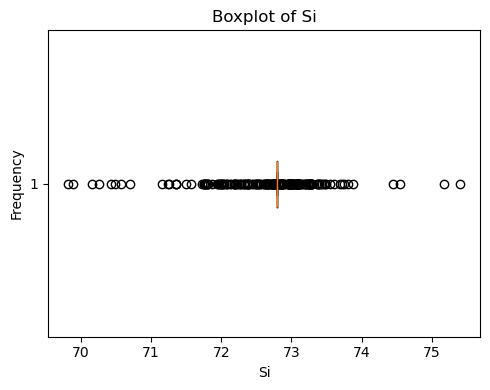

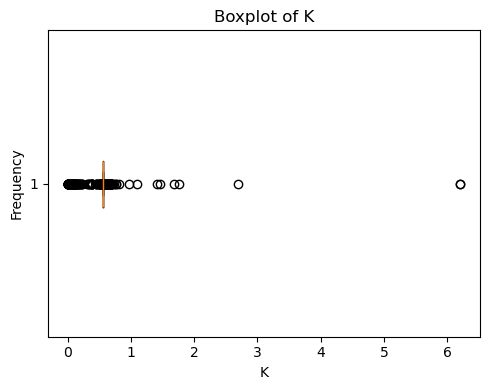

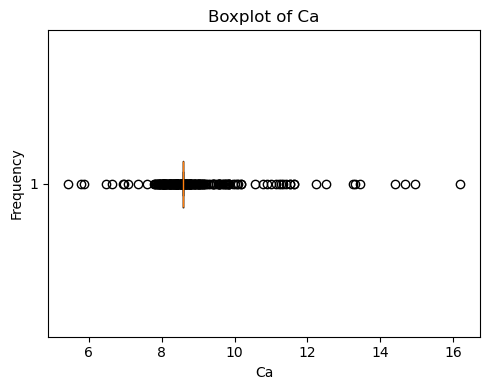

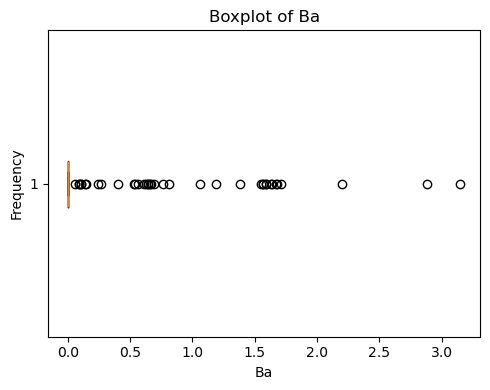

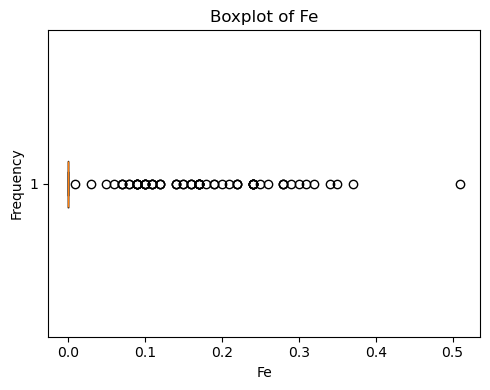

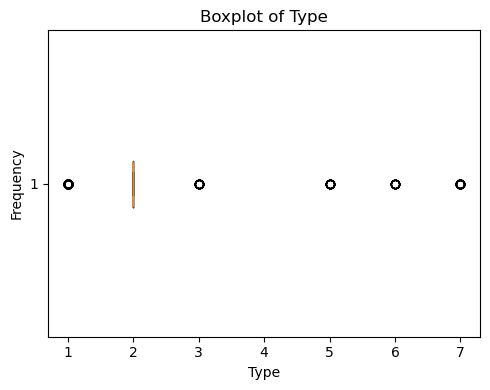

In [10]:
# ---------------------------------------------------
#  Boxplot
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in df.columns:
    plt.figure(figsize=(5, 4))        
    plt.boxplot(df[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [11]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.163941,-0.194176,-0.365514,-0.555810,-0.298767,0.818327,0.058339,0.215105,-0.091389
Na,-0.163941,1.000000,-0.295417,0.171391,-0.086828,-0.272625,-0.241662,0.344379,-0.158921,0.510852
Mg,-0.194176,-0.295417,1.000000,-0.493535,-0.077820,0.039458,-0.484657,-0.553251,-0.136783,-0.773113
Al,-0.365514,0.171391,-0.493535,1.000000,-0.028931,0.309542,-0.218032,0.497010,0.003641,0.609119
Si,-0.555810,-0.086828,-0.077820,-0.028931,1.000000,-0.177927,-0.235459,-0.143307,-0.155202,0.092837
K,-0.298767,-0.272625,0.039458,0.309542,-0.177927,1.000000,-0.326382,-0.064042,-0.043126,-0.034154
Ca,0.818327,-0.241662,-0.484657,-0.218032,-0.235459,-0.326382,1.000000,-0.040175,0.208560,0.068975
Ba,0.058339,0.344379,-0.553251,0.497010,-0.143307,-0.064042,-0.040175,1.000000,0.088002,0.614797
Fe,0.215105,-0.158921,-0.136783,0.003641,-0.155202,-0.043126,0.208560,0.088002,1.000000,-0.014271
Type,-0.091389,0.510852,-0.773113,0.609119,0.092837,-0.034154,0.068975,0.614797,-0.014271,1.000000


#### Analysis

The correlation analysis reveals several strong relationships that help explain how the models achieve their classification performance. The most influential pattern is the strong positive correlation between RI and Ca, indicating that calcium content is a major driver of refractive index, which helps models like Random Forest distinguish glass types more easily. Likewise, Mg shows a strong negative correlation with Type, meaning specific glass categories tend to have low magnesium levels, giving the models a clear separation boundary. Meanwhile, Ba and Al exhibit strong positive correlations with Type, highlighting that specialty or engineered glass types contain higher concentrations of barium and aluminum—critical indicators picked up effectively by boosting algorithms. The strong negative correlation between Si and RI also aligns chemically with silica’s refractive properties and further supports model differentiation. Finally, the negative relationship between Ba and Mg suggests distinct compositional trade-offs in manufacturing, which provides additional separation for ensemble classifiers. Collectively, these correlations shape the feature importance landscape and directly contribute to the high accuracies observed across Random Forest, Bagging, and Boosting models.

### 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [12]:
#1.Done with handling missing values by filling them with median values
#2.There are no categorical values in this dataset

In [13]:
X = df.drop("Type", axis=1)
y = df["Type"]


In [18]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    max_samples=0.6,
    max_features=0.7,
    n_estimators=500,
    random_state=100,
    max_depth=7
)

# Fit model
RF.fit(X_train_scaled, y_train)

# Predictions
Y_pred_train = RF.predict(X_train_scaled)
Y_pred_test  = RF.predict(X_test_scaled)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

training_accuracy  = accuracy_score(y_train, Y_pred_train)
test_accuracy      = accuracy_score(y_test, Y_pred_test)

print("RandomForest - Training accuracy:", np.round(training_accuracy, 2))
print("RandomForest - Test accuracy:", np.round(test_accuracy, 2))

# FOR MULTICLASS: use 'macro' or 'weighted'
print("Precision (macro):", precision_score(y_test, Y_pred_test, average='macro'))
print("Recall (macro):", recall_score(y_test, Y_pred_test, average='macro'))
print("F1 Score (macro):", f1_score(y_test, Y_pred_test, average='macro'))

# Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, Y_pred_test))

RandomForest - Training accuracy: 0.99
RandomForest - Test accuracy: 0.96
Precision (macro): 0.7962121212121213
Recall (macro): 0.7224025974025974
F1 Score (macro): 0.745254266805991

Classification Report:

              precision    recall  f1-score   support

         1.0       0.80      0.86      0.83        14
         2.0       0.98      0.98      0.98       176
         3.0       0.00      0.00      0.00         1
         5.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         6

    accuracy                           0.96       200
   macro avg       0.80      0.72      0.75       200
weighted avg       0.96      0.96      0.96       200



### 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.

In [30]:
#Bagging ---> bagging with decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier      #if target variable is continuous we can use BaggingRegressor
bag=BaggingClassifier(estimator=DecisionTreeClassifier(),max_samples=0.6,max_features=0.7,n_estimators=300,random_state=100)
bag.fit(X_train_scaled,y_train)

Y_pred_train = bag.predict(X_train_scaled)
Y_pred_test = bag.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(y_train,Y_pred_train)
test_accuracy  = accuracy_score(y_test,Y_pred_test)

import numpy as np
print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))
# FOR MULTICLASS: use 'macro' or 'weighted'
print("Precision (macro):", precision_score(y_test, Y_pred_test, average='macro'))
print("Recall (macro):", recall_score(y_test, Y_pred_test, average='macro'))
print("F1 Score (macro):", f1_score(y_test, Y_pred_test, average='macro'))

# Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, Y_pred_test))

trianing accuracy: 1.0
test accuracy: 0.97
Precision (macro): 0.9638257575757576
Recall (macro): 0.8900162337662337
F1 Score (macro): 0.9128679031696273

Classification Report:

              precision    recall  f1-score   support

         1.0       0.80      0.86      0.83        14
         2.0       0.98      0.98      0.98       176
         3.0       1.00      1.00      1.00         1
         5.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         6

    accuracy                           0.97       200
   macro avg       0.96      0.89      0.91       200
weighted avg       0.97      0.97      0.97       200



In [31]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier   #if target variable is continuous we can use GradientBoostingREgressor
GB=GradientBoostingClassifier (max_features=0.7,n_estimators=500,learning_rate=0.1)
GB.fit(X_train_scaled,y_train)

Y_pred_train = GB.predict(X_train_scaled)
Y_pred_test = GB.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(y_train,Y_pred_train)
test_accuracy  = accuracy_score(y_test,Y_pred_test)

import numpy as np
print("GradientBoostingClassifier  trianing accuracy:", np.round(training_accuracy,2))
print("GradientBoostingClassifier  test accuracy:", np.round(test_accuracy,2))
# FOR MULTICLASS: use 'macro' or 'weighted'
print("Precision (macro):", precision_score(y_test, Y_pred_test, average='macro'))
print("Recall (macro):", recall_score(y_test, Y_pred_test, average='macro'))
print("F1 Score (macro):", f1_score(y_test, Y_pred_test, average='macro'))

# Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, Y_pred_test))

GradientBoostingClassifier  trianing accuracy: 1.0
GradientBoostingClassifier  test accuracy: 0.96
Precision (macro): 0.8771645021645021
Recall (macro): 0.8771645021645021
F1 Score (macro): 0.8493867243867244

Classification Report:

              precision    recall  f1-score   support

         1.0       0.79      0.79      0.79        14
         2.0       0.98      0.98      0.98       176
         3.0       0.50      1.00      0.67         1
         5.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         6

    accuracy                           0.96       200
   macro avg       0.88      0.88      0.85       200
weighted avg       0.96      0.96      0.96       200



#### Analysis

The performance comparison between Random Forest, Bagging, and Gradient Boosting shows clear differences in how each model handles complexity, bias, and variance. Random Forest achieves strong results with 96% test accuracy, though its macro precision (0.80) and macro recall (0.72) indicate that it performs unevenly across the minority classes—typical for multi-class imbalanced datasets. Bagging delivers the most balanced and robust performance, achieving the highest test accuracy (97%), along with excellent precision (0.96), recall (0.89), and F1-score (0.91), suggesting that the ensemble of multiple decision trees greatly reduces variance and improves generalization across all classes. Gradient Boosting also performs competitively with 96% test accuracy and balanced macro metrics (precision and recall both 0.88), but its F1-score (0.85) is slightly lower than Bagging, indicating that although boosting effectively reduces bias by sequentially correcting errors, it may be more sensitive to noise. Overall, Bagging outperforms both Random Forest and Gradient Boosting in this dataset, offering the best generalization and class-balanced performance, while Random Forest remains a strong baseline and Gradient Boosting provides a good trade-off between accuracy and balanced class performance.

1. Explain Bagging and Boosting methods. How is it different from each other.
 Bagging (Bootstrap Aggregating) is an ensemble method that reduces variance by training several models independently on different bootstrapped samples of the dataset and then combining their outputs through voting or averaging, with Random Forest being the most common example; Boosting, however, reduces bias by training models sequentially so that each new model focuses on correcting the errors of the previous ones, forming a strong learner from many weak learners as seen in AdaBoost, Gradient Boosting, and XGBoost, making the key difference that bagging trains learners in parallel to stabilize predictions while boosting trains them in sequence to progressively improve accuracy.

2. Explain how to handle imbalance in the data.
 To handle imbalanced data, techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or adjusting class weights to penalize misclassification of minority samples can be applied, along with using specialized algorithms like Balanced Random Forest or XGBoost with tuned imbalance parameters, and evaluating model performance with appropriate metrics like precision, recall, F1-score, PR-AUC, and confusion matrices rather than accuracy to ensure reliable assessment.